# Regressão Linear Múltipla e KNN
dataset: ruidos

## Importação das Bilbiotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression


## Importação do Dataset

In [2]:
df = pd.read_csv('/content/drive/My Drive/PORTIFOLIO/Algoritmos Machine Learning/Datasets/ruido.csv')
df.head()

,Nivel,Aceitavel
0,55.3,1
1,56.1,1
2,57.9,1
3,65.3,1
4,55.9,1


## Seleção das variáveis para treinamento do Modelo

In [3]:
# Seleção de variáveis para Modelo 1 depende da aceleração, volume e potência
X1 = df[['Nivel']]
y1 = df['Aceitavel']

print('==>MODELO 1')
print('Dimensões de X1:', X1.shape)
print('Tipo de X1:', type(X1))
print('Dimensões de y1:', y1.shape)
print('Tipo de y1:', type(y1))

==>MODELO 1
Dimensões de X1: (77, 1)
Tipo de X1: <class 'pandas.core.frame.DataFrame'>
Dimensões de y1: (77,)
Tipo de y1: <class 'pandas.core.series.Series'>


## Treinamento do Modelo de Regressão Logística

In [4]:
#Treinamento do Modelo 1
modelo1 = LogisticRegression()
modelo1.fit(X1,y1)

print('Coeficientes: ', modelo1.intercept_,modelo1.coef_)

Coeficientes:  [22.87530798] [[-0.35404057]]


## Plotando gráfico de disperção com curva do modelo

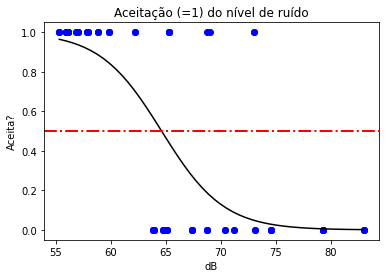

In [5]:
# Análise gráfica
# Diagrama de dispersão entre y (falha) e a temperatura
plt.scatter(X1,y1,color = 'blue')
plt.title("Aceitação (=1) do nível de ruído")
plt.xlabel("dB")
plt.ylabel("Aceita?")
 
# Cria um array com 50 valores
x_graf = np.linspace(start = np.min(X1),stop = np.max(X1),num = 50)
x_graf = x_graf.reshape(-1,1)           # Ajusta as dimensões: 50 linhas, 1 coluna
y_graf = modelo1.predict_proba(x_graf)   # Calula os valores de y correspondentes
 
# Traça a curva do modelo sobre o diagrama de dispersão
plt.plot(x_graf,y_graf[:,1],color = 'black')  # Obs.: utiliza a segunda coluna de "y_graf"
plt.axhline(y=0.5, linestyle='dashdot', color ='red', linewidth=2) # Traça fronteira de decisão
plt.show()    # "Consolida" a exibição dos gráficos

## Previsão dos Modelos

In [6]:
y1_prev = modelo1.predict(X1)

## Matriz de Confusão

In [7]:
# Matriz de confusão e métricas para o modelo de regressão logística

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y1,y1_prev))

[[31  6]
 [ 8 32]]


## Relatório de Classificação (Acurácia, Precisão, Recall e F1-score)

In [8]:
print(classification_report(y1,y1_prev))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.84      0.80      0.82        40

    accuracy                           0.82        77
   macro avg       0.82      0.82      0.82        77
weighted avg       0.82      0.82      0.82        77



## Curva ROC do Modelo 1

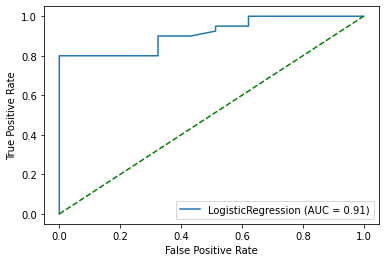

In [9]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(modelo1,X1,y1) # Curva ROC do modelo 1
plt.plot([0,1],[0,1],'k--',color = 'green')  # Curva ROC de modelo aleatório
plt.show()

# Exercício 03

## Normalização de atributos

In [10]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler() # Instância
escalador.fit(X1)

#Padronização, mudar eles de escala para que o conjunto de dados tenha média=0 e desvio padrão=1
X1_Norm = escalador.transform(X1)

## Treinando modelo de KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier(n_neighbors =5) #n_neighbors é para quantos vizinhos mais próximos irei classificar
modeloKNN.fit(X1_Norm,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Previsão de Modelo

In [12]:
y_prevKNN = modeloKNN.predict(X1_Norm)

## Matriz de Confusão

In [13]:
print(confusion_matrix(y1,y_prevKNN))

[[37  0]
 [ 6 34]]


## Relatório de Classificação

In [14]:
print(classification_report(y1,y_prevKNN, digits=4)) #digits eu coloco qtas casas decimais os valores

# Acurácia: Proproção geral de classificaçoes que foram feitas corretamente
# Precisão [Segunda coluna]: Proporção de classificações positivas feitas corretamente => Se é importante prestar atenção nos Falsos Positivos, vou querer controlar a Precisão, FP sejam pequenos.
# Revocação (Recall) [Segunda linha] : Proporção das classes posititivas que o modelo identificou => Se é importante prestar atenção nos Falsos Negativos, vou querer controlar Revocação, FN sejam pequenos.


              precision    recall  f1-score   support

           0     0.8605    1.0000    0.9250        37
           1     1.0000    0.8500    0.9189        40

    accuracy                         0.9221        77
   macro avg     0.9302    0.9250    0.9220        77
weighted avg     0.9330    0.9221    0.9218        77



## Gráfico de Curva ROC do Modelo KNN
Quando eu quero comparar modelos de naturezas diferentes, o Gráfico de Curva ROC é a melhor maneira, olhando a AUC (Area Under Curve), quanto maior melhor.
Ela tambpém serve para comparar modelos da mesma natureza também.
Já as métricas é mais para entender características em relação as variáveis e analisar FP e VP e etc...

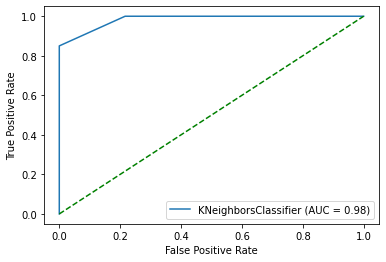

In [15]:
plot_roc_curve(modeloKNN,X1_Norm,y1) # Curva ROC do modelo 1
plt.plot([0,1],[0,1],'k--',color = 'green')  # Curva ROC de modelo aleatório
plt.show()